# Notebook 4: Algorithmic Fairness - Considering Different Definitions

Decision making within the United States criminal justice system relies heavily on risk assessment, which determines the potential risk that a released defendant will fail to appear in court or cause harm to the public. Judges use these assessments to decide if bail can be set or if a defendant should be detained before trial. While this is not new in the legal system, the use of risk scores determined by an algorithm are gaining prevalence and support. Proponents promote the use of risk scores to guide judges in their decision making, arguing that machine learning could lead to greater efficiency, accountability, and less biased decisions compared with human judgment ([Henry](https://theappeal.org/risk-assessment-explained/)). On the other hand, critical voices raise the concern that biases can creep into these algorithms at any point in the process, and that algorithms are often applied to the wrong situations ([Henry](https://theappeal.org/risk-assessment-explained/)). Further, they exacerbate the racism embedded deep within the criminal justice system by perpetuating inequalities found in historical data ([Henry](https://theappeal.org/risk-assessment-explained/)).

In the debate about the use of risk assessment algorithms, people have used data analysis to determine the extent to which these algorithms are fair to different groups of people. In this notebook, **you will explore some of the many definitions and metrics (different ways of operationalizing data to quantify those definitions) of fairness that you will apply to a prominent  risk assessment tool called COMPAS in an attempt to evaluate whether the algorithm is biased**.  Along the way, you will examine the arguments and analyses made by the company that created COMPAS and the critics of this risk assessment tool to gain a deeper understanding of the technical and societal interpretations and implications of fairness. 


**NOTE**: When we discuss bias in this notebook, we define it most generally as prejudice or an inclination in favor of one person, thing, or group compared to another. In the context of machine learning, bias is a “phenomenon that occurs when an algorithm produces results that are systemically prejudiced due to erroneous assumptions in the machine learning process” ([Rouse](https://searchenterpriseai.techtarget.com/definition/machine-learning-bias-algorithm-bias-or-AI-bias#:~:text=Machine%20learning%20bias%2C%20also%20sometimes,in%20the%20machine%20learning%20process)).

## Learning Objectives
After completing this notebook, you will be able to:
- Identify how algorithms exist as part of socio-technical systems - as in, they are technological tools that are created by and interact with humans in social institutions.
- Recognize that there are different definitions of fairness that can be applied to evaluate algorithms, and critically examine how these definitions are emerging from and support different sociotechnical imaginaries of justice. 
- Understand how definitions of fairness are co-produced with racist systems/institutions. 
- Recognize the limits and opportunities of technical solutions to problems of algorithmic bias, and what historical and institutional contexts need to be considered to aim for fairness in algorithm design and deployment.
- Consider what kinds of community knowledge and other professional expertise besides their own is necessary to think through socio-technical issues.
- Consider what issues that are relevant to the COMPAS ecosystem (i.e. criminal justice system, affected communities) but outside of the algorithm itself, need to be addressed to be able to create a more just system, with or without the algorithm.


## Table of Contents:
* [Part 0. COMPAS](#part-zero)
* [Part 1. The Coproduction of Justice and Data](#part-one)
* [Part 2. ProPublica's Perspective](#part-two)
* [Part 3. Northpointe's Perspective](#part-three)
* [Part 4. Yet Another Definition of Fairness](#part-four)
* [Part 5. Conclusion](#part-five)

#### Dependencies

Let's begin by importing the packages we need that will give us the appropriate tools and methods needed.

In [1]:
import numpy as np # Loads numerical methodss
import pandas as pd # This allows us to transform our data into tables (AKA DataFrames) 

from sklearn.metrics import roc_curve, roc_auc_score # Loads visualization tools for a ROC Curve
import matplotlib.pyplot as plt # Loads more visualization tools
import seaborn as sns # Loads more visualization tools

import otter
generator = otter.Notebook()

# These install a fairness package with the DisparateImpactRemover tool used in Part 4
!pip install aif360
!pip install BlackBoxAuditing
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import BinaryLabelDataset

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


---

# Part 0. COMPAS: Why it was created and how it exists in the court system <a id="part-zero"></a>

COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a commercial tool produced by the for-profit company Northpointe known as a recidivism risk assessment system. Tools like COMPAS are used **to predict the risk of future crimes for an individual who has entered the US criminal justice system by outputting a risk score from 1-10**. While COMPAS was initially intended to aid decisions made by probation officers on treatment and supervision of those who are incarcerated, Northpointe has since emphasized the scalability of the tool to “fit the needs of many different decision points'' including pre-screening assessments, pretrial release decisions (whether or not to hold an arrested individual in jail until their trial), and post-trial next steps for the defendant ([Northpointe](http://www.northpointeinc.com/files/downloads/FAQ_Document.pdf)). These algorithms are believed by many to hold the power to relieve the court system of unfair human bias from criminal justice officials.

**NOTE**: In machine learning, COMPAS is considered a ***model***. A model is composed of a dataset that has ***features*** (the columns in the data table) and an ***algorithm***, which is a procedure that predicts a target feature from other features in the dataset. For example, COMPAS uses an algorithm to predict the likelihood of recidivism with a risk score (target feature) by using information about the defendant such as age and criminal history (represented in the columns of our dataset). 


<!-- BEGIN QUESTION -->

### Question 0a
Explain 3 parties that are impacted by the COMPAS tool. In what ways are they impacted? (Can you think of impacts beyond those in the courtroom for at least one of your examples?)

<!--
BEGIN QUESTION
name: q0a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->


<!-- BEGIN QUESTION -->
### Question 0b
Based on your initial reading, what is one problem of the criminal justice system that the COMPAS tool could potentially alleviate? What is one potential problem that using the COMPAS algorithm could introduce? 
<!--
BEGIN QUESTION
name: q0b
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

----

# Part 1: The Coproduction of Justice and Data <a id="part-one"></a>

## Question 1. Understanding the Methods of Data Collection

Before a risk score is determined for a defendant, they are asked to fill out a questionnaire with questions meant to help predict the defendant’s level of risk. Let’s take a look at this questionnaire to get a better understanding of what goes into determining a risk score.

[Here](https://www.documentcloud.org/documents/2702103-Sample-Risk-Assessment-COMPAS-CORE.html) is a link to a sample questionnaire.

<!-- BEGIN QUESTION -->

### Question 1a

What aspects of the questionnaire were particularly striking to you? How might the questionnaire and justice system influence each other? 

<!--
BEGIN QUESTION
name: q1a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1b 

How is race embedded in the questionnaire? 

<!--
BEGIN QUESTION
name: q1b
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*
<!-- END QUESTION -->

---

## Question 2. Understanding the Data

We will be using the data that was obtained and utilized by ProPublica in their own analysis of the COMPAS tool from Broward County public records of people who were scored between 2013 and 2014 ([ProPublica](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm)). In order to follow ProPublica's analysis, we remove any cases where the charge was not within 30 days of the score (ProPublica did this in order to match the COMPAS score with the correct criminal case). We are left with 6172 rows in the dataset.

In [2]:
data = pd.read_csv('compas-scores-two-years.csv')
data = data.query('days_b_screening_arrest <= 30 & days_b_screening_arrest >= -30')
data

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


We are also able to filter out any information that was not used by ProPublica and select fields for severity of charge, number of priors, demographics, age, sex, compas scores, and whether each person was accused of a crime within two years.

In [3]:
select_data = data[["age", "c_charge_degree", "race", "age_cat", "score_text", "sex", "priors_count", 
                    "days_b_screening_arrest", "decile_score", "is_recid", "two_year_recid", "c_jail_in", "c_jail_out"]]
select_data.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
5,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
6,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30


<!-- BEGIN QUESTION -->

### Question 2a

Identify features in the dataset that could be proxies for sensitive attributes? 

<!--
BEGIN QUESTION
name: q2a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

***Sensitive features*** are features within a dataset that are given special consideration and treatment for potential legal, social, or ethical reasons. Often, these features are recognized and protected by antidiscrimination or privacy laws. One example of a sensitive feature is age. 

----

# Part 2. ProPublica’s Perspective <a id="part-two"></a>

### Who is ProPublica?

ProPublica is a nonprofit organization that “produces investigative journalism with moral force” ([ProPublica](https://www.propublica.org/about/)). ProPublica was founded as a nonpartisan newsroom aiming to expose and question abuses of power, justice, and public trust, often by systems and institutions deeply ingrained in the US.

In 2016, ProPublica investigated the COMPAS algorithm to assess the accuracy of and potential racial bias within the tool, as it became more popular within the United States court system nationwide. In their analysis, ProPublica used data from defendants with risk scores from Broward County from 2013 to 2014 to test for statistical differences in outcomes for Black and white defendants, which ultimately highlighted racial disparities that exist within the algorithm. ProPublica came to the conclusion that COMPAS utilizes data from a criminal justice system with a history of racial injustices, thus continuing to disproportionately target and arrest Black people in comparison to their white counterparts. While the COMPAS algorithm treats unequal groups alike, which may appear neutral, ProPublica’s data analysis and reporting emphasized the bias against Black defendants and their communities that COMPAS produced from this line of thinking, a claim that Northpointe has disputed (as we will see later).

Let's retrace ProPublica's statistical analysis in order to better understand ProPublica's argument and engage with the metric of fairness that it uses. In order to mimic their analysis more closely, we will use ProPublica’s definitions of “high” and “low” scores: any score above a 4 is considered a high score, while 4 and below is considered a low score. 


## Question 3. Visualization of Disparity 

Let’s visualize how ProPublica began their investigation of racial disparity within the COMPAS risk assessment. The histogram below displays the differences between the risk scores of black and white defendants.

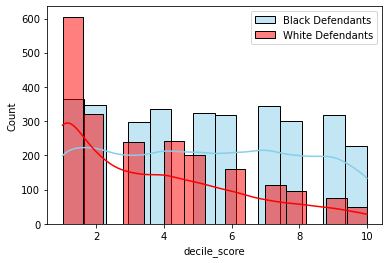

In [5]:
# Code to create a histogram for the risk scores for Black defendants
black_def = select_data[select_data["race"] == "African-American"]
sns.histplot(black_def["decile_score"], color = "skyblue", label = "Black Defendants", kde=True)

# Code to create a histogram for the risk scores for white defendants
white_def = select_data[select_data["race"] == "Caucasian"]
sns.histplot(white_def["decile_score"], color= "red", label = "White Defendants", kde=True); # This plot will layer over the previous plot

plt.legend()
plt.show()

<!-- BEGIN QUESTION -->

### Question 3a

Is one racial group more likely to get a high risk score opposed to the other? If so, why? (Hint: connect this to your knowledge of the history of policing and institutionalized racism.)

<!--
BEGIN QUESTION
name: q3a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

----

## Question 4. FPR and FNR: Does COMPAS overpredict or underpredict across groups?

Recall that models use algorithms to predict a target feature (in this case the likelihood of recidivism). We can evaluate how well a model predicts these features by using ***goodness metrics***. Goodness metrics typically summarize discrepancies between actual values and predicted values. Metrics like these are quite important in data science and typically are used by data scientists to determine how accurate and effective an algorithm is at predicting its predetermined goal.  

In order to answer this question and understand the ways in which bias is present in the risk scores, ProPublica used the **False Positive Rate (FPR)** and **False Negative Rate (FNR)** as their metrics to understand and quantify fairness. In terms of COMPAS, the FPR tells us the percentage of defendants that do not reoffend even though they were predicted to reoffend by the algorithm (*the defendants that did not reoffend and received a “high” score*). On the other hand, the FNR tells us the percentage of defendants that do reoffend even though they were predicted to not reoffend by the algorithm (*the defendants that did reoffend and received a “low” score*). 

Below we have calculated the False Positive Rates and False Negative rates based on the data from the risk scores.  We did this by creating functions that calculate each metric. You do not need to understand the code, but feel free to go through it yourself! [Here](https://medium.com/datadriveninvestor/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f) is more information on how to calculate metrics like FPR and FNR if you are interested.  


In [6]:
def fpr(race_feature, data):
    # Function returns the False Positive Rate of scores for the specified race_feature
    
    subgroup = data[data["race"] == race_feature]
    did_not_recidivate = subgroup[subgroup["two_year_recid"] == 0]

    false_positives = did_not_recidivate[did_not_recidivate["decile_score"] > 4].shape[0]
    true_negatives = did_not_recidivate[did_not_recidivate["decile_score"] <= 4].shape[0]
    return false_positives / (false_positives + true_negatives)


def fnr(race_feature, data):
    # Function returns the False Negative Rate of scores for the specified race_feature
    
    subgroup = data[data["race"] == race_feature]
    recidivated = subgroup[subgroup["two_year_recid"] == 1]
    
    false_negatives = recidivated[recidivated["decile_score"] <= 4].shape[0]
    true_positives = recidivated[recidivated["decile_score"] > 4].shape[0]
    return false_negatives / (false_negatives + true_positives)


In [7]:
# Apply the metrics to the dataset
print("FPR for Black defendants:", round(fpr("African-American", select_data), 5) * 100, "%")
print("FPR for white defendants:", round(fpr("Caucasian", select_data), 5) * 100, "%")
print("FNR for Black defendants:", round(fnr("African-American", select_data), 4) * 100, "%")
print("FNR for white defendants:", round(fnr("Caucasian", select_data), 5) * 100, "%")

FPR for Black defendants: 42.338 %
FPR for white defendants: 22.014 %
FNR for Black defendants: 28.48 %
FNR for white defendants: 49.635 %


<!-- BEGIN QUESTION -->

### Question 4a

Are these percentages different across racial groups? Whose risk scores are overpredicted, and whose are underpredicted?
<!--
BEGIN QUESTION
name: q4a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4b

What is the importance of overprediction and underprediction in regard to ProPublica’s analysis? How might they have real impacts on the defendants who receive scores?
<!--
BEGIN QUESTION
name: q4b
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

----

<!-- BEGIN QUESTION -->

### Question 5
What kinds of problems does ProPublica highlight in the COMPAS algorithm? How would you describe ProPublica’s definition of fairness, after learning and utilizing the metrics they used? 

<!--
BEGIN QUESTION
name: q5
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

---
# Part 3. Northpointe's Perspective <a id="part-three"></a>

### Who is Northpointe? (acquired by equivant)

Northpointe (merged with two other companies to create equivant in 2017) is a for-profit computer software company that aims to advance justice by informing and instilling confidence in decision makers at every stage of the criminal justice system ([equivant](https://www.equivant.com/)).  In addition to operating and continuing to develop COMPAS, *equivant* has developed a variety of technologies for use in court case management, attorney case management, inmate classification, and risk/needs assessment strategies.  

In the wake of criticism from ProPublica and other researchers alike, Northpointe produced a [detailed response](http://go.volarisgroup.com/rs/430-MBX-989/images/ProPublica_Commentary_Final_070616.pdf) to ProPublica’s allegations, claiming that these critiques of their tool utilized the wrong type of classification statistics in their analysis and portrayed the tool incorrectly. The company provided their own analysis of the COMPAS algorithm by using different statistical methods and responding individually to each of ProPublica’s claims of racial bias against Black defendants. 

Upon examining their tool’s fairness through a metric called *accuracy equity* (a metric that was left out of ProPublica’s analysis), as well as the fact that the model was not trained with a race feature, Northpointe concluded that their algorithm treats all people and specified groups equally, and therefore does not exhibit signs of bias or inequality for specified groups. Now, let’s take a look at how Northpointe supported this argument.


---
## Question 6. Sensitive Features: How can a model be racially biased without a race feature?

Northpointe made it very clear that they did not utilize any race feature (a column that informs the algorithm of the race of each defendant) in their dataset when they were training their algorithm. Northpointe decided that as a result of neglecting this race feature, the COMPAS tool would not take race into account when making decisions for defendants and therefore cannot be biased against certain races. 

<!-- BEGIN QUESTION -->
### Question 6a

Think back to our discussion in Part 1 about sensitive features and proxies. Can you think of any way race is *still* embedded in the algorithm, even though it does not use a race feature to make decisions?

<!--
BEGIN QUESTION
name: q6a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
### Question 6b

Why might neglecting to consider race in the context of the US criminal justice system be harmful or problematic? Can data scientists’ algorithms be absolved of racial bias if they decide to not take race into account within their models? Explain why or why not. 

<!--
BEGIN QUESTION
name: q6b
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

---

## Question 7: Accuracy Equity: Is each group being discriminated against equally?

Instead of analyzing and comparing the model errors FNR and FPR (the metrics you calculated in the previous ProPublica section), Northpointe utilized complement of FNR, known as the TPR (or what is often referred to as *Sensitivity*), paired with the FPR in a visualization called the ROC Curve. Once again, the TPR is a new way to measure the “goodness” of a model, similar to FNR and FPR. Northpointe made use of the *ROC Curve*, which we describe below, to prove what they refer to as ***Accuracy Equity***. Accuracy equity, according to [Northpointe](http://go.volarisgroup.com/rs/430-MBX-989/images/ProPublica_Commentary_Final_070616.pdf), is exhibited in the model “if it can discriminate recidivists and nonrecidivists equally well for two different groups such as blacks and whites.” In order to connect these two ideas, we first need to learn what this curve does and how it is used to understand fairness. 

In data science, we can use a visualization called the **Receiver Operating Characteristic (ROC) curve** to interpret ***how much a model is capable of distinguishing between classes***. We do this by plotting the curve and deriving the **Area Under the Curve (AUC)**. The higher the AUC, the better the model is at predicting our target variable. Northpointe utilized this method by plotting metrics we have already calculated: the FPR on the x-axis and TPR on the y-axis, and then calculating and comparing the **AUC** for the subgroup of data with white defendants and the subgroup of data with Black defendants.

Below is the code to create this visualization. You do not need to understand the code itself, but feel free to go through it yourself! 

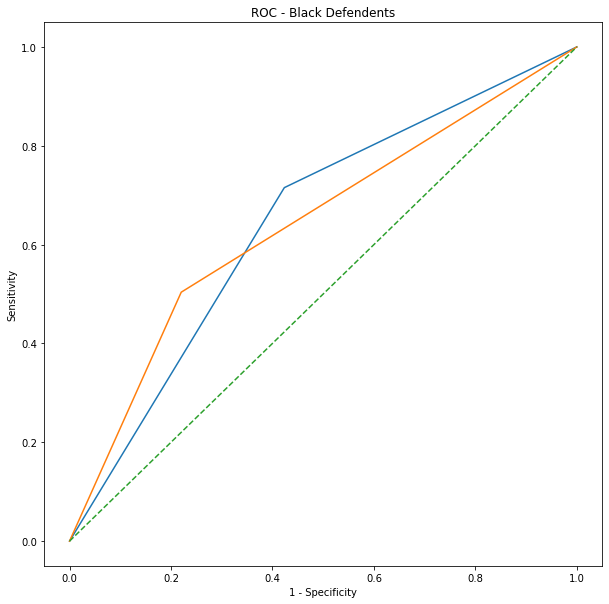

In [8]:
# Calculate FPR and FNR from metrics package - Black defendants
black_def = select_data[select_data["race"] == "African-American"]
# True values (if the defendants reoffended)
y1 = black_def['two_year_recid']
# Predicted values from COMPAS tool (risk scores)
pred1 = black_def["decile_score"].replace([1, 2, 3, 4], 0).replace([5, 6, 7, 8, 9, 10], 1)
fpr_black, tpr_black, threshold = roc_curve(y1, pred1)

# Calculate FPR and FNR from metrics package - White defendants
white_def = select_data[select_data["race"] == "Caucasian"]
# True values (if the defendants reoffended)
y2 = white_def['two_year_recid']
# Predicted values from COMPAS tool (risk scores)
pred2 = white_def["decile_score"].replace([1, 2, 3, 4], 0).replace([5, 6, 7, 8, 9, 10], 1)
fpr_white, tpr_white, threshold = roc_curve(y2, pred2)

# Set up the plot for the ROC curve
plt.subplots(1, figsize=(10,10))
plt.title('ROC - Black Defendents')
plt.plot(fpr_black, tpr_black)
plt.plot(fpr_white, tpr_white)
plt.plot([0, 1], ls="--")
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.show()


In [9]:
# Calculate and print the AUC
print("AUC for Black defendants:", roc_auc_score(y1, pred1))
print("AUC for white defendants:", roc_auc_score(y2, pred2))

AUC for Black defendants: 0.6459250089670798
AUC for white defendants: 0.641754559907007


<!-- BEGIN QUESTION -->
### Question 7a. 

What do you notice from the ROC curve and the AUC calculation? Please list at least 2 observations.
<!--
BEGIN QUESTION
name: q7a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
### Question 7b. 
What could Northpointe take away from this visualization to prove their point? (Hint: Is each racial group being discriminated against equally? Can you distinguish between racial groups or are they more or less the same?) 

Recall: the AUC helps us determine by *how much a model is capable of distinguishing between classes*.
<!--
BEGIN QUESTION
name: q7b
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

---
## Question 8.

<!-- BEGIN QUESTION -->
### Question 8a

How would you describe Northpointe’s definition of fairness, after learning and utilizing the metrics they used? How is this different from your description of ProPublica’s definition from Q5a? 
<!--
BEGIN QUESTION
name: q8a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
### Question 8b

If anything, what are ProPublica and Northpointe each not considering in their definitions? (Hint: Think about your knowledge of the historical context of policing data.) Go beyond what they don’t consider and how it has real world implications– how do historical contexts inform current and future policing?
<!--
BEGIN QUESTION
name: q8b
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*


<!-- END QUESTION -->

---

# Part 5. Conclusion <a id="part-five"></a>

## Question 9: Which Definition is Fair? And Who Decides?

It is important to consider many types of knowledge and experiences beyond data science expertise when analyzing and creating an algorithm like COMPAS. As such, you will think through issues of expertise and fairness in the next set of questions.

We’ve now gone through three definitions of fairness, each one with a different idea of how to operationalize fairness and to judge whether or not an algorithm is fair. As a data scientist, you may encounter situations where you will need to make decisions that affect real-world outcomes and people! Let’s try to do this for COMPAS. 

<!-- BEGIN QUESTION -->

### Question 9a

If you were to weigh the strengths and weaknesses of the two definitions of fairness above, which definition do you think is somewhat stronger (more “fair”) for everyone who goes through the court system? What values did you consider as you made this decision? If you cannot come to a decision, what challenges did you come across when considering this? It’s okay if you think neither definition is better than the other.

<!--
BEGIN QUESTION
name: q9a
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
### Question 9b

Take a step back and think about how different actors who created, utilize, and are affected by COMPAS would consider which definition is most fair. Name two relevant actors, and discuss which definition of fairness each actor would decide is most fair. If you don’t think they’d choose any of them, explain why. (In choosing relevant actors, please be as specific as possible) 
<!--
BEGIN QUESTION
name: q9b
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

Choosing one definition of fairness can be incredibly difficult when you need to consider all the actors at play. Throughout this module we have examined where and how the COMPAS algorithm is appropriate to use. It is also important to recognize the problems that are not solvable by an algorithm and think through how we can make the ecosystem that COMPAS is in  (which includes but is not limited to the legal system, affected communities, the tech industry, etc.) more just.

<!-- BEGIN QUESTION -->
### Question 9c

In the long term, how might the use of the COMPAS algorithm affect how judges make decisions? How might it affect their expertise? Why might this be of concern?
<!--
BEGIN QUESTION
name: q9c
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

You’ve now begun to think through the very complex systems in which the COMPAS algorithm functions. Congratulations! Through considering a few of the differing definitions of fairness connected to COMPAS, hopefully you can begin to understand some of the human contexts of  creating algorithms that intentionally affect people and their decision-making. 

<!-- BEGIN QUESTION -->
### Question 9d
Let’s assume the false positive and false negative rates across different racial groups were equalized. Would the harm incurred by an “error” be experienced the same way? Describe at least one way in which an algorithm like COMPAS could have disproportionate adverse effects on individuals from different communities with different histories even when the algorithm is “fair” in both senses described in this module. 
<!--
BEGIN QUESTION
name: q9d
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
### Question 9e
Drawing on material from lecture and this unit’s readings, describe at least one additional way in which questions of algorithmic fairness fail to capture something essential about justice in the case of the COMPAS.
<!--
BEGIN QUESTION
name: q9e
points: 1
manual: true
-->

**Answer:** *YOUR ANSWER HERE*

<!-- END QUESTION -->
----

In [10]:
# Save your notebook first, then go to `Kernel` > `Restart and Run All Cells`
# Download the zip file, which contains a copy of your notebook and your written responses.
generator.export("notebook4compas.ipynb")

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2626: character maps to <undefined>